In [4]:
#imports
import numpy as np
import matplotlib.pyplot as plt
# imports
import pandas as pd

In [5]:
filename = 'HW4GaussianClustersData.csv'
#reading the csv file

data2 = pd.read_csv(filename,header=None)
data2.columns=('X','Y')

In [6]:
#printing the data shape for verification with the data
print(data2.shape)

(6600, 2)


In [7]:
data2.head(10)

,X,Y
0,17.969,28.651
1,15.631,29.014
2,16.909,30.997
3,13.882,36.453
4,12.939,31.437
5,20.651,26.662
6,18.715,25.143
7,17.039,30.830
8,17.064,30.469
9,22.405,21.928


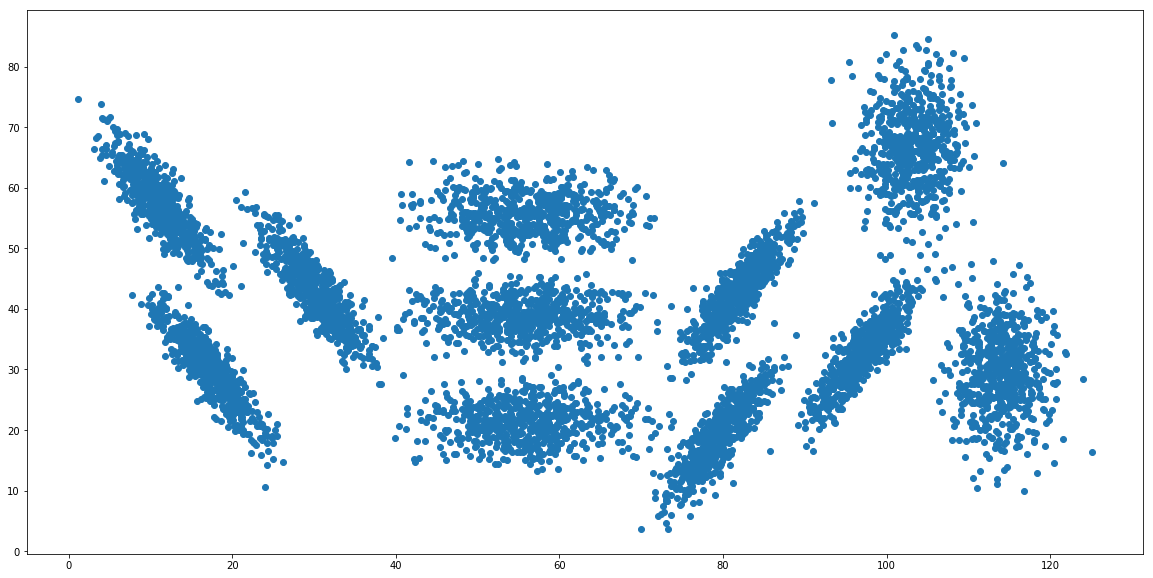

In [8]:
#plotting the 2-d data
plt.figure(figsize=(20,10))
plt.scatter(data2.X, data2.Y)

plt.show()

In [9]:
#runnning k-means on the data for all the values of k
from sklearn.cluster import KMeans
import numpy as np
y_pred_3 = KMeans(n_clusters=3, random_state=0).fit_predict(data2)
y_pred_5 = KMeans(n_clusters=5, random_state=0).fit_predict(data2)
y_pred_7 = KMeans(n_clusters=7, random_state=0).fit_predict(data2)
y_pred_9 = KMeans(n_clusters=9, random_state=0).fit_predict(data2)
y_pred_11 = KMeans(n_clusters=11, random_state=0).fit_predict(data2)
y_pred_13 = KMeans(n_clusters=13, random_state=0).fit_predict(data2)
y_pred_15 = KMeans(n_clusters=15, random_state=0).fit_predict(data2)
y_pred_17 = KMeans(n_clusters=17, random_state=0).fit_predict(data2)
y_pred_19 = KMeans(n_clusters=19, random_state=0).fit_predict(data2)

# Plotting data for all values of k

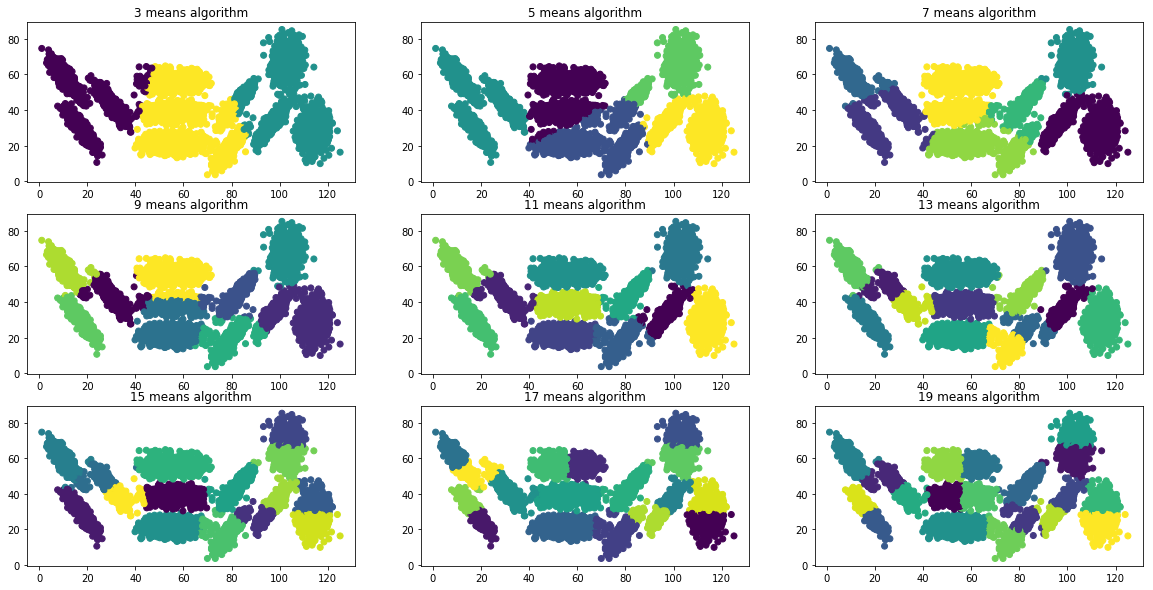

In [10]:

plt.figure(figsize=(20,10))
plt.subplot(331)                        #plotting in a subplot at the 1st row,1st column
plt.scatter(data2.X,data2.Y,c=y_pred_3)
plt.title("3 means algorithm")

plt.subplot(332)
plt.scatter(data2.X,data2.Y,c=y_pred_5) #plotting in a subplot at the 1st row,2nd column
plt.title("5 means algorithm")

plt.subplot(333)
plt.scatter(data2.X,data2.Y,c=y_pred_7) # 1st row,3rd column
plt.title("7 means algorithm")

plt.subplot(334)
plt.scatter(data2.X,data2.Y,c=y_pred_9)
plt.title("9 means algorithm")

plt.subplot(335)
plt.scatter(data2.X,data2.Y,c=y_pred_11)
plt.title("11 means algorithm")
plt.subplot(336)
plt.scatter(data2.X,data2.Y,c=y_pred_13)
plt.title("13 means algorithm")

plt.subplot(337)
plt.scatter(data2.X,data2.Y,c=y_pred_15)
plt.title("15 means algorithm")
plt.subplot(338)
plt.scatter(data2.X,data2.Y,c=y_pred_17)
plt.title("17 means algorithm")
plt.subplot(339)
plt.scatter(data2.X,data2.Y,c=y_pred_19)
plt.title("19 means algorithm")



plt.show()

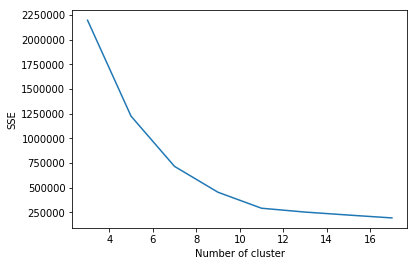

In [11]:
sse = {}
for k in range(3,19,2):       #for k in 3,5,7,9,11,13,15,17,19
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data2)
    data2["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))#plotting the keys vs values
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

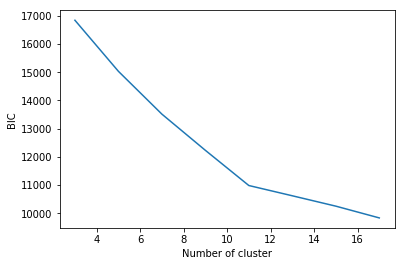

In [12]:
#plotting the values of bic
import math
bic = {}
n=6600
for k in range(3,19,2):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data2)
    data2["clusters"] = kmeans.labels_
    #print(data["clusters"])
    bic[k] = n*math.log10(kmeans.inertia_/n)+math.log10(n)*k*3 # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(bic.keys()), list(bic.values()))#plotting bic values vs bic keys
plt.xlabel("Number of cluster")    #labels
plt.ylabel("BIC")
plt.show()

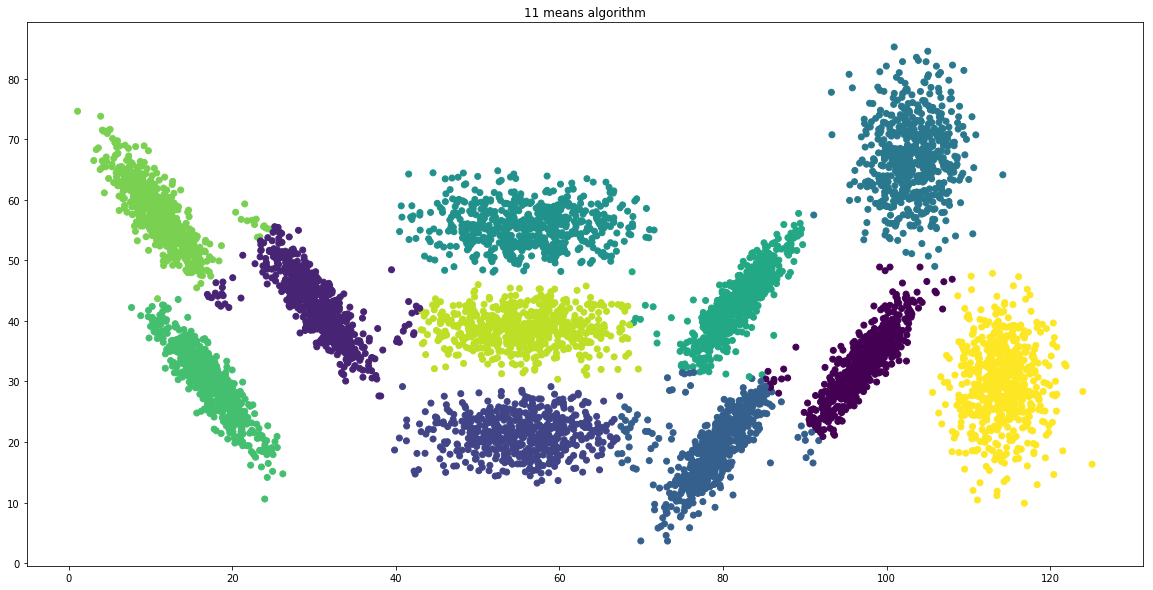

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(data2.X,data2.Y,c=y_pred_11)    #scatter plot the 11 clusters data
plt.title("11 means algorithm")
plt.show()

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score   
silhouette_avg = silhouette_score(data2, y_pred_5)              #calcluating silhoutte score
print("For n_clusters = 5", 
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.455200658481


In [15]:
X=data2.X
Y=data2.Y

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.430950109411
For n_clusters = 5 The average silhouette_score is : 0.4588995564
For n_clusters = 7 The average silhouette_score is : 0.48618539495
For n_clusters = 9 The average silhouette_score is : 0.540378072316
For n_clusters = 11 The average silhouette_score is : 0.567787775815
For n_clusters = 13 The average silhouette_score is : 0.603123929464
For n_clusters = 15 The average silhouette_score is : 0.614282930258
For n_clusters = 17 The average silhouette_score is : 0.594907981708
For n_clusters = 19 The average silhouette_score is : 0.558352731447


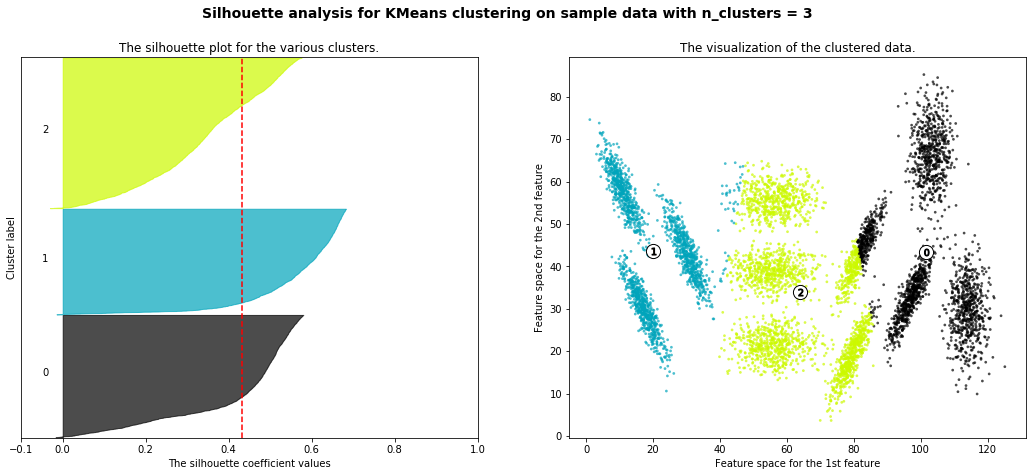

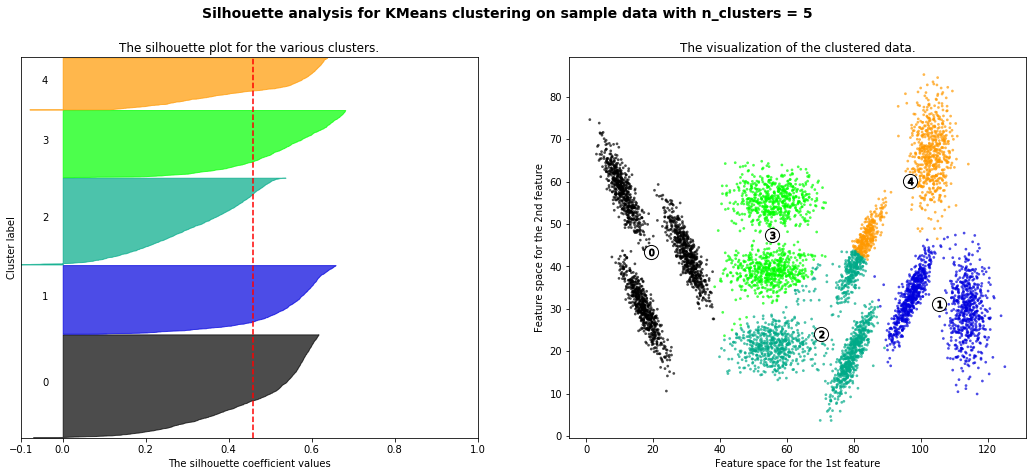

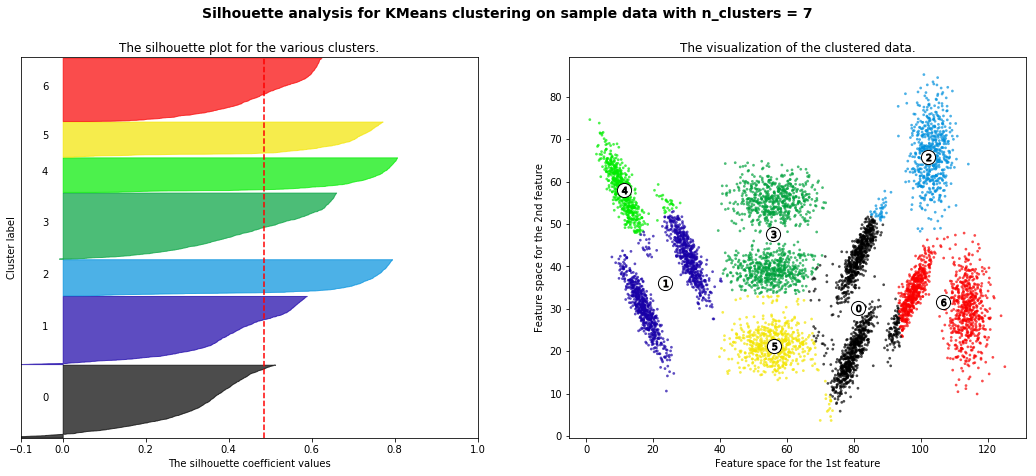

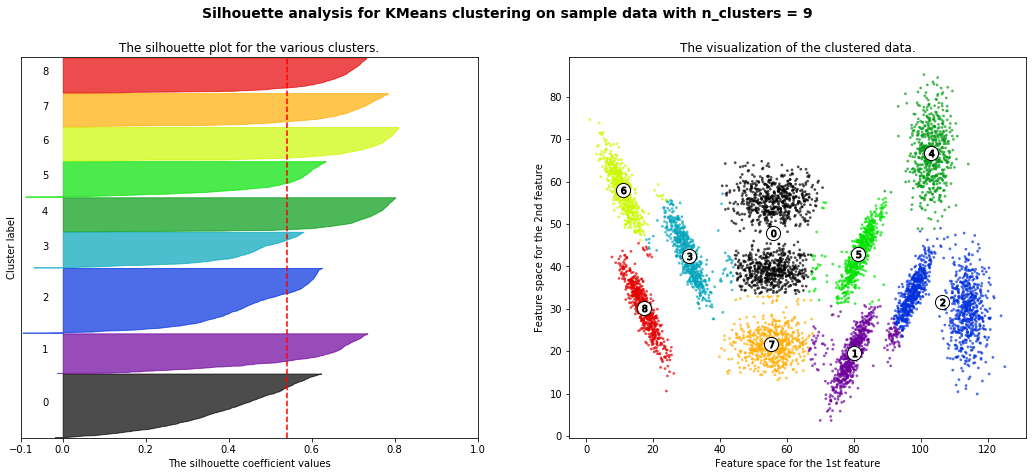

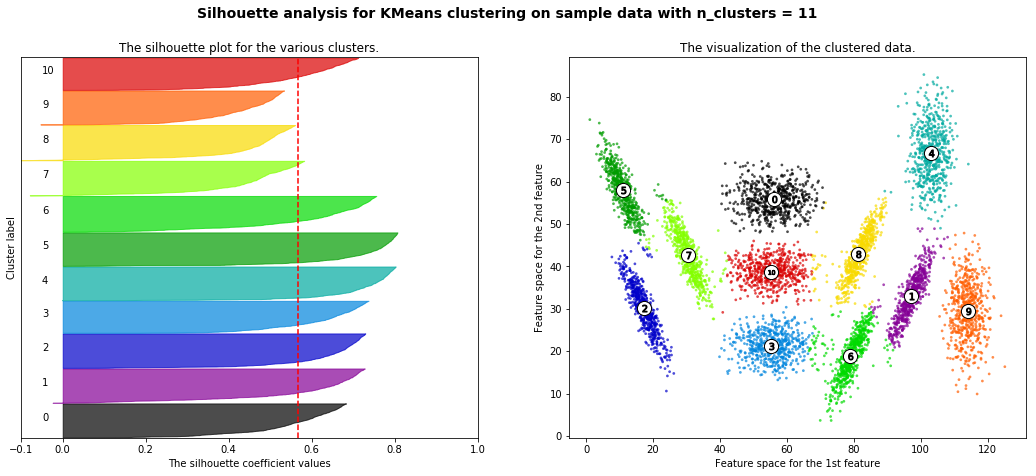

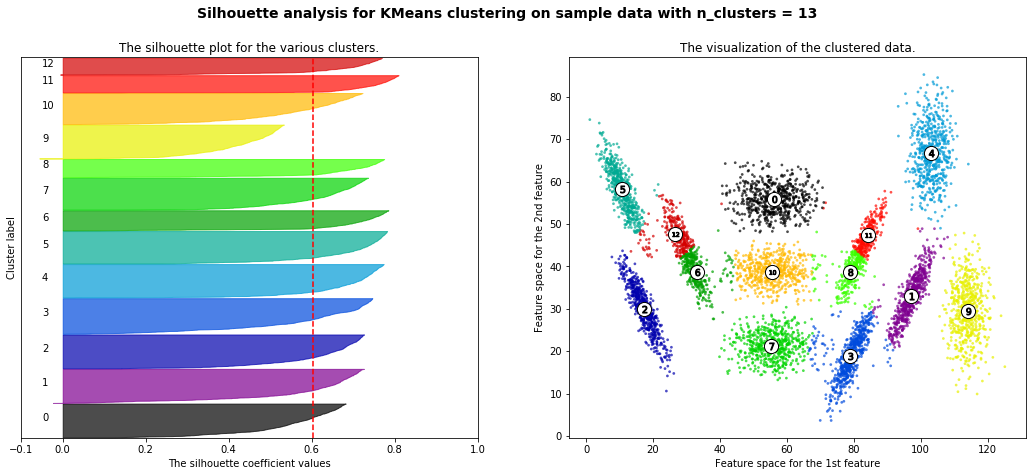

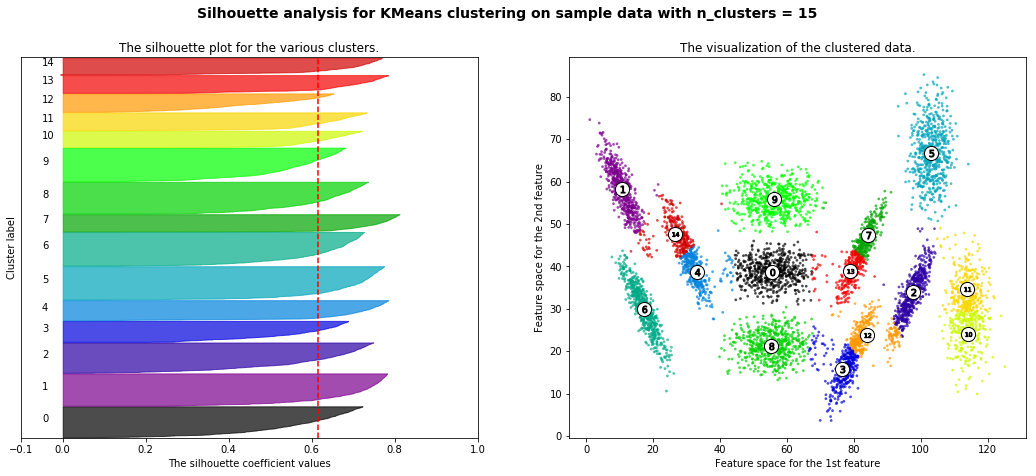

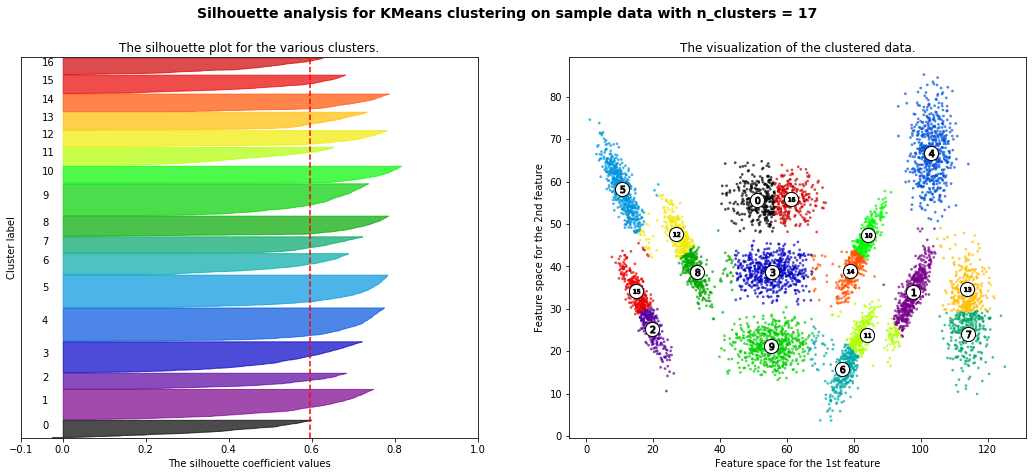

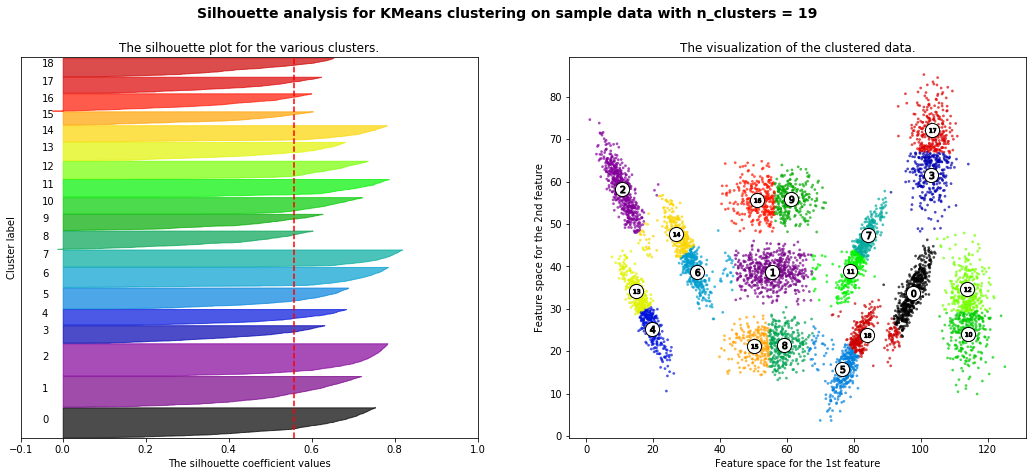

In [16]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
 #                 n_features=2,
  #                centers=4,
   #               cluster_std=1,
    #              center_box=(-10.0, 10.0),
     #             shuffle=True,
      #            random_state=1)  # For reproducibility

range_n_clusters = [3, 5, 7, 9, 11,13,15,17,19]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this case all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data2.X, data2.Y, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

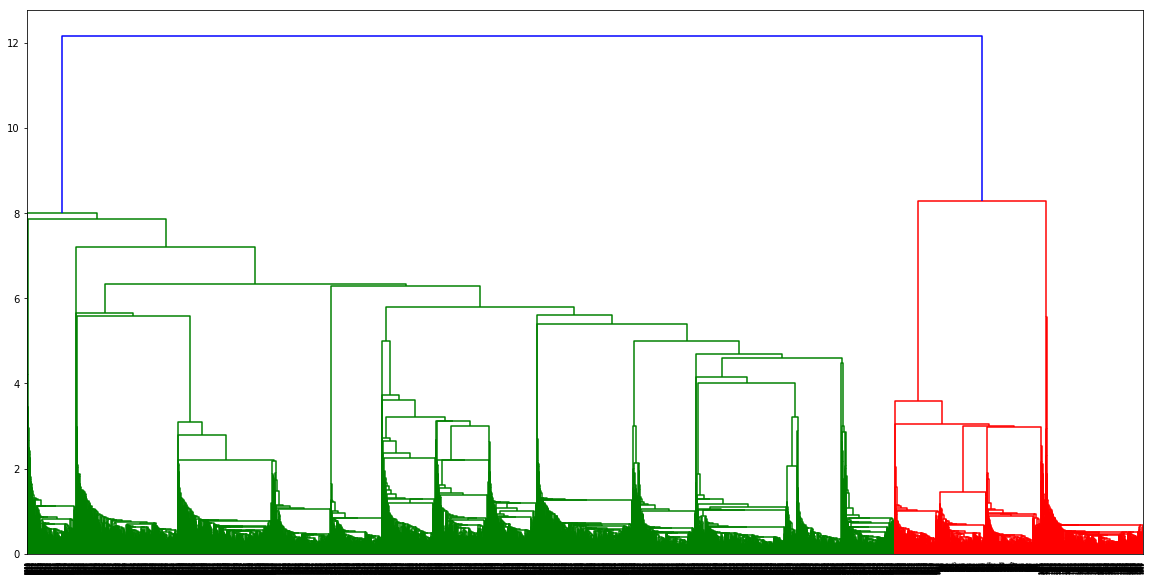

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

#using min/single linkage for hierarchial clustering
Z = linkage(data2, 'single')
plt.figure(figsize=(20, 10))  
#dendrogram with the given specifications
dendrogram(Z,
            orientation='top',
            distance_sort='ascending',
            show_leaf_counts=True)
plt.show()  

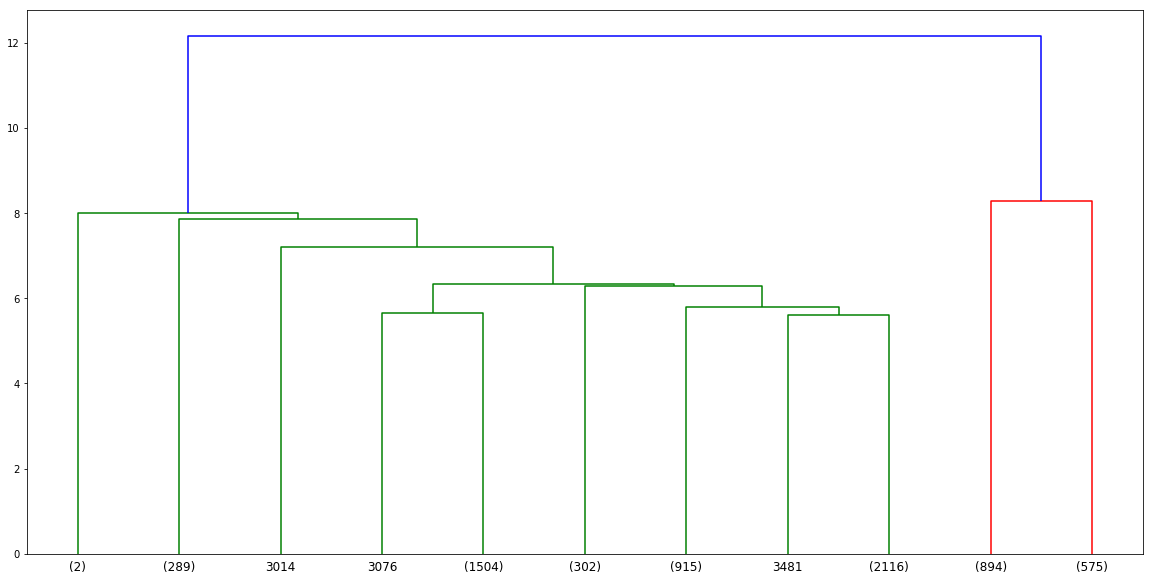

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
#min linkage with the dataset
Z = linkage(data2, 'single')
plt.figure(figsize=(20, 10))  
dendrogram(Z,truncate_mode='lastp',  p=11,     #dendrogram which shows only 11 clusters
            orientation='top',
            distance_sort='ascending',
            show_leaf_counts=True)
plt.show()  

In [20]:
import scipy.cluster.hierarchy as sch
den = sch.dendrogram(Z) #passing Z to form the dendrogram

In [21]:

from scipy.cluster.hierarchy import fcluster
k=11
clusters = fcluster(Z,k, criterion='maxclust')       #Finds a minimum threshold such that not more than 11 clusters are formed
clusters

array([10, 10, 10, ...,  6,  6,  6], dtype=int32)

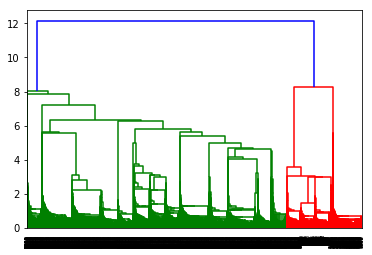

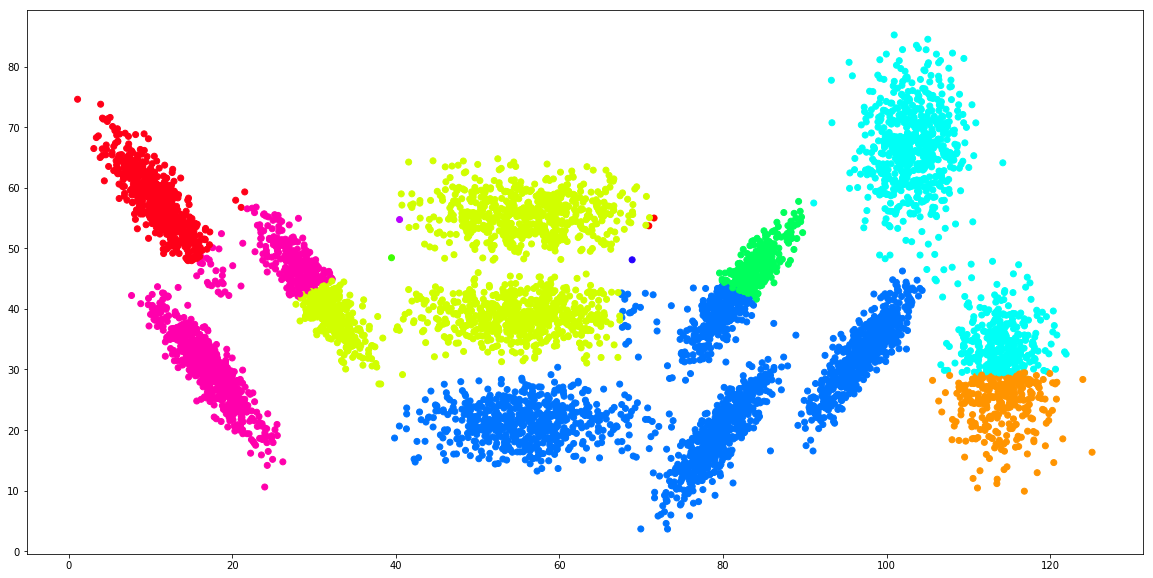

In [22]:
import matplotlib.markers
plt.figure(figsize=(20, 10))
plt.scatter(data2.X, data2.Y, c=clusters,cmap='hsv')     #using hsv for color plotting
plt.show()
